In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Load MNIST data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Add noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)



In [4]:
# Build autoencoder
input_img = Input(shape=(28, 28, 1))

#encoder
x = Conv2D(64, (3,3), padding = 'same', activation = 'relu')(input_img)
x  = MaxPooling2D((2,2), padding = 'same')(x)
x = Conv2D(32, (3,3), padding = 'same', activation = 'relu')(x)
encoder  = MaxPooling2D((2,2), padding = 'same')(x)

#decoder
x = Conv2D(32, (3,3), padding = 'same', activation = 'relu')(encoder)
x  = UpSampling2D((2,2))(x)
x = Conv2D(64, (3,3), padding = 'same', activation = 'relu')(x)
x  = UpSampling2D((2,2))(x)
decoder = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoder)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')



In [5]:
# Train
autoencoder.fit(x_train_noisy, x_train,
                epochs=5,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))



Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - loss: 0.2319 - val_loss: 0.1123
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1116 - val_loss: 0.1058
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1061 - val_loss: 0.1033
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.1035 - val_loss: 0.1010
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.1016 - val_loss: 0.0996


In [7]:
# Visualize
decoded_imgs = autoencoder.predict(x_test_noisy)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


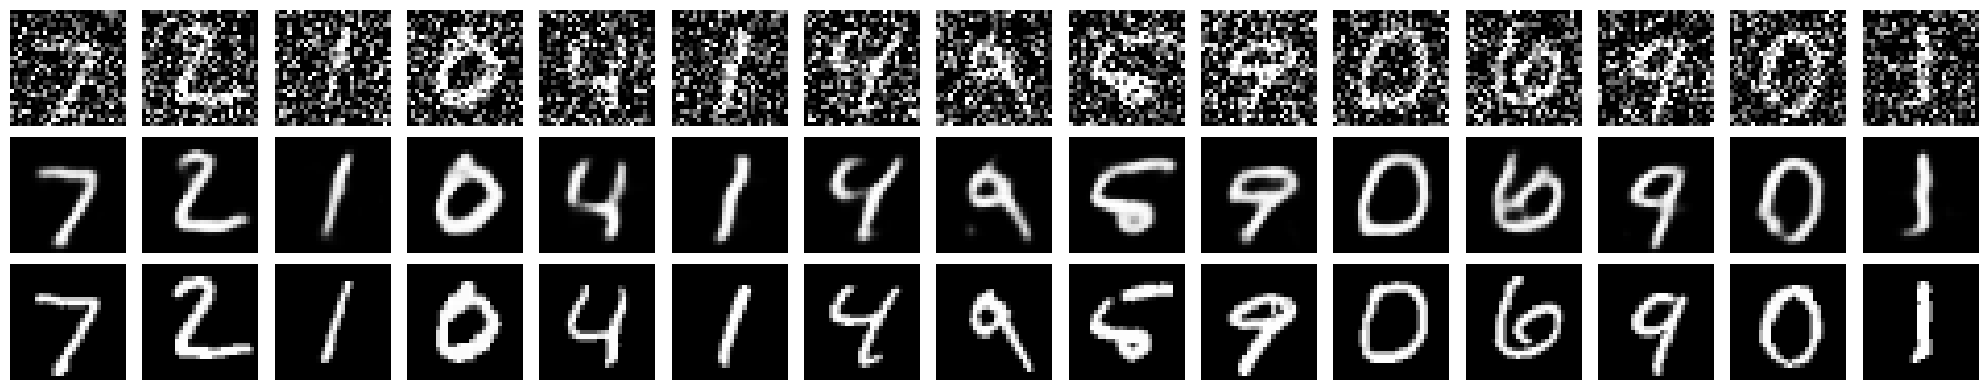

In [8]:
n = 15
plt.figure(figsize=(20, 4))
for i in range(n):
    # Noisy input
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    # Cleaned output
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    # Ground truth
    ax = plt.subplot(3, n, i + 2*n + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()